# Introduction

This case specifically created for as an examplar workshop for **Sigortam.net**

Author : Salih Bulut

Date : 14 June 2025

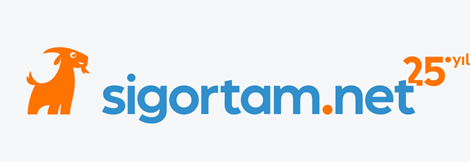



## About Company

&nbsp;&nbsp;&nbsp;&nbsp;Founded in 2000 as part of the iLab Group, Sigortam.net serves as Turkey's first and leading digital insurance platform to meet the needs of its customers with 10 million customers, more than 25 contracted insurance companies and nearly 500 employees.

## Business Task

Analyze the data to gain insights from customers insurance pattern and discover trends and insights for Sigortam.net marketing strategy.

## Tools
Python for Data Cleaning, Data Transformation, Data Visualisation and Data Analysis

## About Data
The data set is publicly available on Kaggle [Health Insurance Cross Sell Prediction](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction).



--- Insurance Purchase Prediction Analysis ---
This project aims to analyze the provided insurance dataset to understand factors influencing customer decisions to purchase vehicle insurance. We will cover data loading, cleaning, organization, and visualization to derive actionable insights for stakeholders.

--- 2. Data Loading and Initial Inspection ---
Successfully loaded data from: C:\Users\User\Downloads\sample\Sample_Insurance_Data_Sigortam.Net - Sheet1.csv
Dataset shape: 999 rows, 10 columns

First 5 rows of the dataset:
   id  Gender  Age  Driving_License  Previously_Insured Vehicle_Age  \
0   1    Male   44                1                   0   > 2 Years   
1   2    Male   76                1                   0    1-2 Year   
2   3    Male   47                1                   0   > 2 Years   
3   4    Male   21                1                   1    < 1 Year   
4   5  Female   29                1                   1    < 1 Year   

  Vehicle_Damage_History Annual_Premium_

C:\Users\User\AppData\Local\Temp\ipykernel_7408\1439531572.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Vehicle_Age"] = df["Vehicle_Age"].replace("< 1 Year", 0)


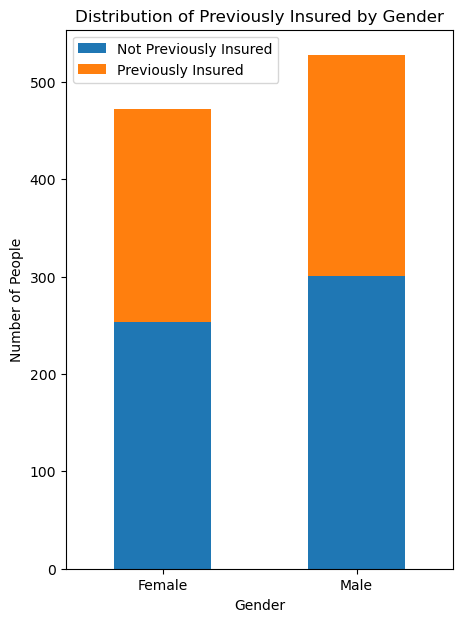

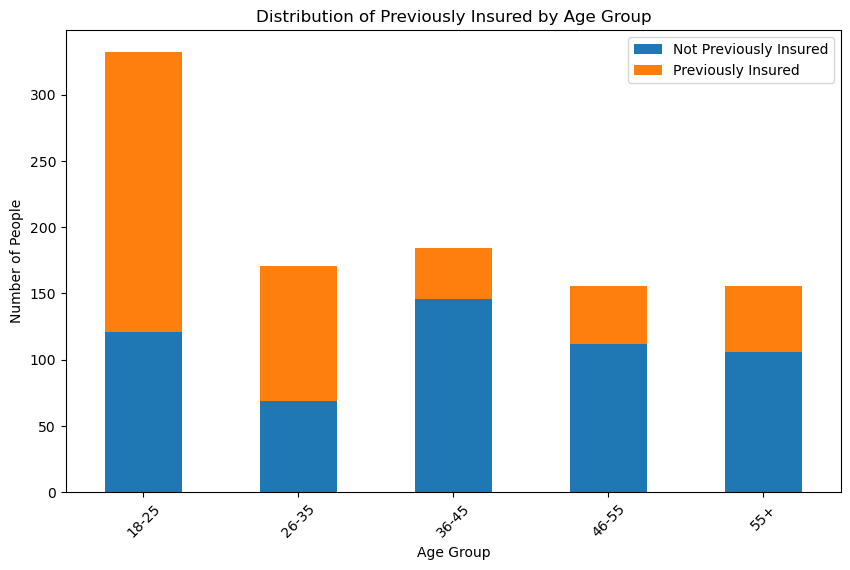

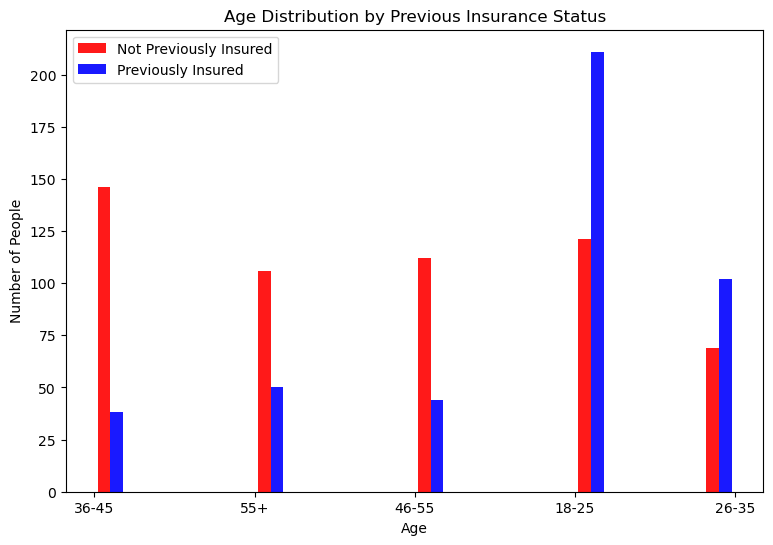

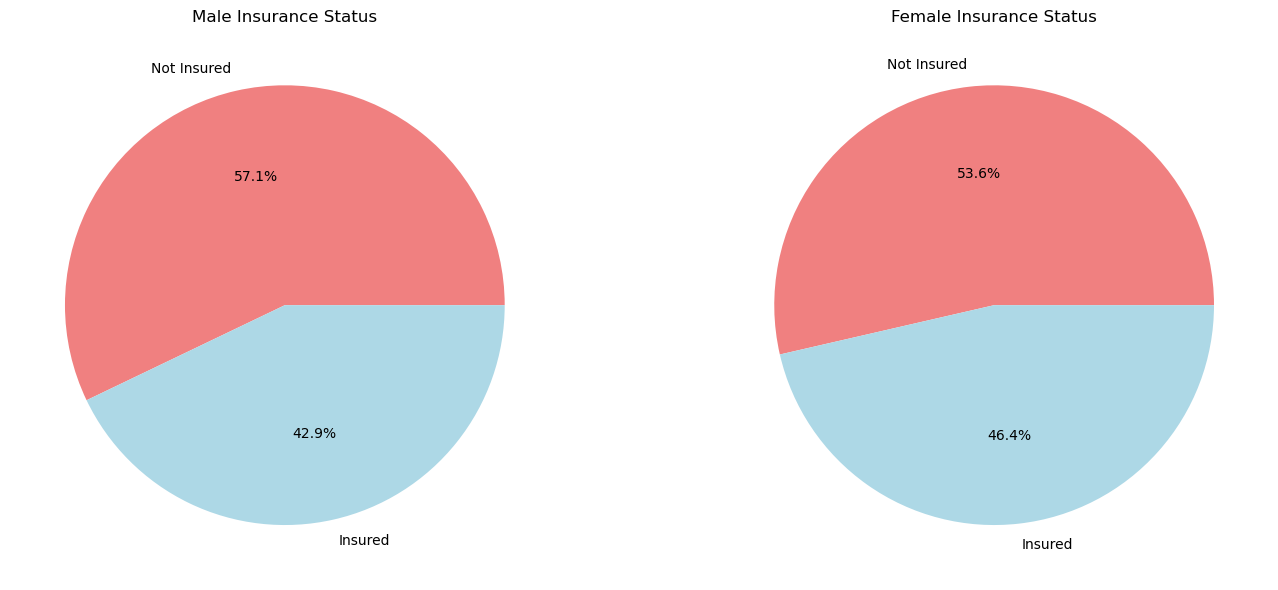

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to see more data
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# --- 1. Project Introduction ---
print("--- Insurance Purchase Prediction Analysis ---")
print("This project aims to analyze the provided insurance dataset to understand factors influencing customer decisions to purchase vehicle insurance. We will cover data loading, cleaning, organization, and visualization to derive actionable insights for stakeholders.")
print("=" * 100)

# --- 2. Data Loading and Initial Inspection ---
print("\n--- 2. Data Loading and Initial Inspection ---")
file_path = r'C:\Users\User\Downloads\sample\Sample_Insurance_Data_Sigortam.Net - Sheet1.csv'
try:
    df = pd.read_csv(r'C:\Users\User\Downloads\sample\Sample_Insurance_Data_Sigortam.Net - Sheet1.csv')
    print(f"Successfully loaded data from: {file_path}")
    print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file is in the correct directory.")
    # Exit or handle the error appropriately if the file is not found
    exit()

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display column information and data types
print("\nDataset information (data types and non-null counts):")
df.info()

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())
print("=" * 100)
# --- 3. Data Cleaning ---
print("\n--- 3. Data Cleaning ---")

# Check for missing values
print("❌ Missing Values Check:")
missing_data = df.isnull()

print("Counting the all rows for missing value")
for column in missing_data.columns:
    print (missing_data[column].value_counts())
    print("")   

# Duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print("   ⚠️  You have duplicate data that needs cleaning!")
# Fix text columns
text_cols = df.select_dtypes(include=['object']).columns
    
for col in text_cols:
     print(f"\nCleaning text in {col}:")
        
# Remove extra spaces
before_spaces = df[col].str.contains('  ', na=False).sum()
df[col] = df[col].str.strip()  # Remove leading/trailing spaces
df[col] = df[col].str.replace('  +', ' ', regex=True)  # Remove extra spaces
        
if before_spaces > 0:
     print(f"   ✅ Fixed extra spaces in {before_spaces} rows")
     changes_made.append(f"Fixed spaces in {col}")

#Enriching the Dataset

df["Vehicle_Age"] = df["Vehicle_Age"].replace("1-2 Year", 1)
df["Vehicle_Age"] = df["Vehicle_Age"].replace("> 2 Years", 2)
df["Vehicle_Age"] = df["Vehicle_Age"].replace("< 1 Year", 0)

print("="*55)
print("Checking the values")


#Correcting the data type

df["Annual_Premium_Pay"] = df["Annual_Premium_Pay"].str.replace('[₹,]', '', regex=True).astype(float)


df["Vehicle_Age"].value_counts()
df.dtypes

# --- 4. Data Analyzing ---
print("\n--- 4. Data Analyzing ---")


# Create crosstab for gender vs previously insured
crosstab = pd.crosstab(df['Gender'], df['Previously_Insured'])

# Stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(5, 7))
plt.title('Distribution of Previously Insured by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.legend(['Not Previously Insured', 'Previously Insured'])
plt.xticks(rotation=0)  # No rotation needed for just Male/Female
plt.show()

# Create age groups for better visualization
df['Age'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], 
                         labels=['18-25', '26-35', '36-45', '46-55', '55+'])

# Create crosstab
crosstab = pd.crosstab(df['Age'], df['Previously_Insured'])

# Stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Previously Insured by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(['Not Previously Insured', 'Previously Insured'])
plt.xticks(rotation=45)
plt.show()

# Filter data by insurance status
insured = df[df['Previously_Insured'] == 1]['Age']
not_insured = df[df['Previously_Insured'] == 0]['Age']

# Create histogram with both groups
plt.figure(figsize=(9, 6))
plt.hist([not_insured, insured], bins=20, alpha=0.9, 
         label=['Not Previously Insured', 'Previously Insured'], 
         color=['red', 'blue'])
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution by Previous Insurance Status')
plt.legend()
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Males only
male_data = df[df['Gender'] == 'Male']['Previously_Insured'].map({0: 'Not Insured', 1: 'Insured'})
male_data.value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
ax1.set_title('Male Insurance Status')
ax1.set_ylabel('')

# Females only  
female_data = df[df['Gender'] == 'Female']['Previously_Insured'].map({0: 'Not Insured', 1: 'Insured'})
female_data.value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
ax2.set_title('Female Insurance Status')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

